In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

## Polynomial Regression

In [2]:
def make_poly_matrix(x, deg=5):
    # given a d-dim vector x = [x1, x2, .. xd], make a d x (M+1) matrix 
    # 1 x1 x1**2 ... x1**M
    # 1 x2 x2**2 ... x2**M
    # ..
    # 1 xd xd**2 ... xd**M
    x = np.asarray(x)
    X = [np.ones(len(x))]
    x1 = x.copy()
    for i in np.arange(deg):
        X.append(x1)
        x1 = x1 * x

    X = np.asarray(X).T # d x M matrix of input 
    print(X.shape)
    return X

In [138]:
def make_fourier_matrix(x, deg=5):

    x_1 = []
    x_0 = []
    
    for i in np.arange(len(x)):
        U1 = np.exp(-1*2j*np.pi*x[i]*(deg))
        x_1.append(U1)

    for i in np.arange(len(x)):
        U2 = np.exp(2j*np.pi*x[i])
        x_0.append(U2)
    
    x_0 = np.asarray(x_0)
    x_1 = np.asarray(x_1)
    X = []
    for i in np.arange((2*deg)+1):
        X.append(x_1)
        x_1 = x_1 * x_0

    X = np.asarray(X).T # d x M matrix of input 
    print(X.shape)
    return X

In [139]:
np.random.seed(1)
N = 3
x_train = []

for i in np.arange(N):
    U5 = np.random.rand()
    x_train.append(U5)
    
    
x_train = np.asarray(x_train)
make_fourier_matrix(x_train, deg=3)


(3, 7)


array([[-0.00669791-9.99977569e-01j,  0.50386207+8.63784123e-01j,
        -0.86713957-4.98065220e-01j,  1.        -2.77555756e-16j,
        -0.86713957+4.98065220e-01j,  0.50386207-8.63784123e-01j,
        -0.00669791+9.99977569e-01j],
       [ 0.53065242-8.47589526e-01j, -0.93126986-3.64330149e-01j,
        -0.18537819+9.82667252e-01j,  1.        -8.60422844e-16j,
        -0.18537819-9.82667252e-01j, -0.93126986+3.64330149e-01j,
         0.53065242+8.47589526e-01j],
       [ 0.99999768-2.15591285e-03j,  0.99999897-1.43727585e-03j,
         0.99999974-7.18638110e-04j,  1.        +2.16840434e-19j,
         0.99999974+7.18638110e-04j,  0.99999897+1.43727585e-03j,
         0.99999768+2.15591285e-03j]])

In [140]:
def poly_regression(x_train, y_train, deg=9, alpha=0):
    # fit polynomial regression of given degree with L2 regularizer alpha
    X = make_poly_matrix(x_train, deg=deg)
    w_hat = np.linalg.pinv(X.T @ X + alpha*np.identity(X.shape[1])) @ X.T @ y_train
    y_hat_train = X @ w_hat
    return y_hat_train, w_hat

In [141]:
def poly_regression_fr(x_train, y_train, deg=9):
    # fit polynomial regression of given degree with L2 regularizer alpha
    X = make_fourier_matrix(x_train, deg=deg)
    w_hat = np.linalg.pinv(X.T @ X) @ X.T @ y_train
    y_hat_train = X @ w_hat
    return y_hat_train, w_hat

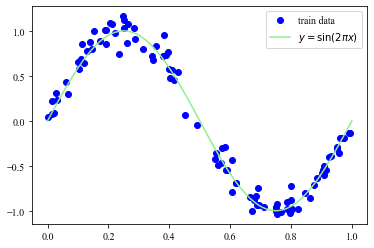

In [142]:
# Generate train and test data from y = sin(2\pi x) + N(0,\sigma^2)

np.random.seed(1)
N = 100
sigma = 0.3
x_train = []
y_train = []
x_test = []
y_test = []
for i in np.arange(N):
    U1 = np.random.rand()
    U2 = np.random.rand()
    e1 = np.random.normal(0,sigma**2)
    e2 = np.random.normal(0,sigma**2) 
    x_train.append(U1)
    x_test.append(U2)
    y_train.append(np.sin(2*np.pi*U1)+e1)
    y_test.append(np.sin(2*np.pi*U2)+e2)
    
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

# make plot
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(x_train, y_train, 'o', color='blue', label="train data")
x = np.linspace(0, 1, 100)
ax.plot(x, np.sin(2*np.pi*x), color='lightgreen', label="$y=\sin(2\pi x)$")
ax.legend()


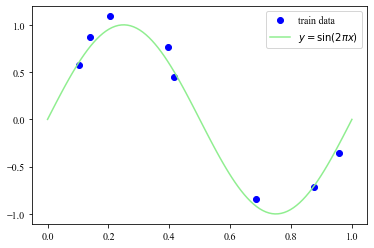

In [143]:
# Generate train and test data from y = sin(2\pi x) + N(0,\sigma^2)

np.random.seed(1)
N = 8
sigma = 0.3
x_train = []
y_train = []
x_test = []
y_test = []
for i in np.arange(N):
    U1 = np.random.rand()
    U2 = np.random.rand()
    e1 = np.random.normal(0,sigma**2)
    e2 = np.random.normal(0,sigma**2) 
    x_train.append(U1)
    x_test.append(U2)
    y_train.append(np.sin(2*np.pi*U1)+e1)
    y_test.append(np.sin(2*np.pi*U2)+e2)
    
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

# make plot
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(x_train, y_train, 'o', color='blue', label="train data")
x = np.linspace(0, 1, 100)
ax.plot(x, np.sin(2*np.pi*x), color='lightgreen', label="$y=\sin(2\pi x)$")
ax.legend()

(8, 3)
(100, 3)
(8, 9)
(100, 9)


/Users/danielm/opt/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/danielm/opt/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(8, 19)
(100, 19)


/Users/danielm/opt/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


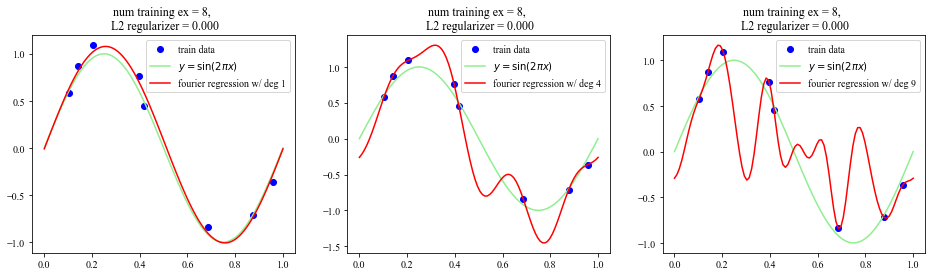

In [144]:
# plot fitted fourier regression curve
deg_list = [1,4,9] # M 
fig, ax = plt.subplots(nrows=1, ncols=len(deg_list), figsize=[16, 4])
for i in np.arange(len(deg_list)):
    # make plot
    M = deg_list[i]
    y_hat_train, w_hat = poly_regression_fr(x_train, y_train, deg=M)
    ax[i].plot(x_train, y_train, 'o', color='blue', label="train data")
    x = np.linspace(0, 1, 100)
    ax[i].plot(x, np.sin(2*np.pi*x), color='lightgreen', label="$y=\sin(2\pi x)$")
    # ax.plot(x_train, y_hat_train, 'o', color = 'red')
    y_poly = make_fourier_matrix(x, deg=M) @ w_hat
    ax[i].plot(x, y_poly, color = 'red', label="fourier regression w/ deg %i" % M)
    ax[i].title.set_text("num training ex = %i, \n L2 regularizer = %.3f" % (N, alpha)) 
    ax[i].legend()
    plt.savefig('four_fitting_ex_2.pdf', bbox_inches='tight')


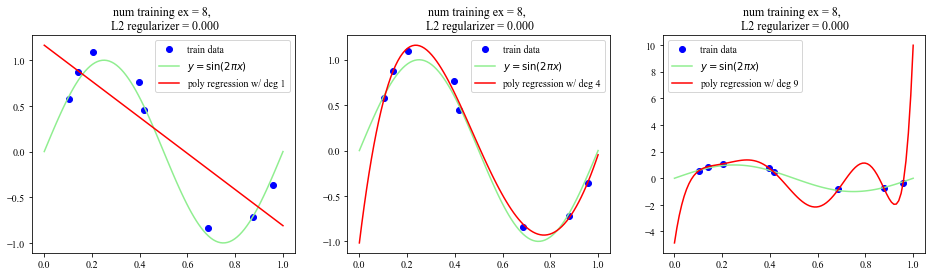

In [84]:
# plot fitted polynomial regression curve
deg_list = [1,4,9] # degree of polynomial 
alpha_list = [0, 0, 0.01, 0.1]
fig, ax = plt.subplots(nrows=1, ncols=len(deg_list), figsize=[16, 4])
for i in np.arange(len(deg_list)):
    # make plot
    M = deg_list[i]
    alpha = alpha_list[1]
    y_hat_train, w_hat = poly_regression(x_train, y_train, deg=M, alpha=alpha)
    ax[i].plot(x_train, y_train, 'o', color='blue', label="train data")
    x = np.linspace(0, 1, 100)
    ax[i].plot(x, np.sin(2*np.pi*x), color='lightgreen', label="$y=\sin(2\pi x)$")
    # ax.plot(x_train, y_hat_train, 'o', color = 'red')
    y_poly = make_poly_matrix(x, deg=M) @ w_hat
    ax[i].plot(x, y_poly, color = 'red', label="poly regression w/ deg %i" % M)
    ax[i].title.set_text("num training ex = %i, \n L2 regularizer = %.3f" % (N, alpha)) 
    ax[i].legend()
    plt.savefig('poly_fitting_ex_2.pdf', bbox_inches='tight')
    

In [227]:
def fit_FR_GD(Y, X, deg=0 ,W0=None, sub_iter=100, stopping_diff=0.01):

        W = []
        if W0 is None:
            for i in np.arange((deg*2)+1):
                W.append(1)
        
        W1 = np.asarray(W)
        i = 0
        grad = np.ones(W1.shape)
        while (i < sub_iter) and (np.linalg.norm(grad) > stopping_diff):
            grad = 2 * X.T @ (X @ W1 - Y)
            W1 = W1 - (0.00001)*(np.log(i+1) / (((i + 1) ** (0.5)))) * grad
            #W1 = W1 - (0.0001) * grad
            i = i + 1
            print('iter %i, grad_norm %f' %(i, np.linalg.norm(grad)))
        return W1

(8,)


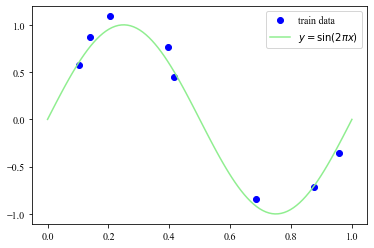

In [228]:
# Generate train and test data from y = sin(2\pi x) + N(0,\sigma^2)

np.random.seed(1)
N = 8
sigma = 0.3
x_train = []
y_train = []
x_test = []
y_test = []
for i in np.arange(N):
    U1 = np.random.rand()
    U2 = np.random.rand()
    e1 = np.random.normal(0,sigma**2)
    e2 = np.random.normal(0,sigma**2) 
    x_train.append(U1)
    x_test.append(U2)
    y_train.append(np.sin(2*np.pi*U1)+e1)
    y_test.append(np.sin(2*np.pi*U2)+e2)
    
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

# make plot
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(x_train, y_train, 'o', color='blue', label="train data")
x = np.linspace(0, 1, 100)
ax.plot(x, np.sin(2*np.pi*x), color='lightgreen', label="$y=\sin(2\pi x)$")
ax.legend()
print(x_train.shape)

(8, 3)
(8, 3)
iter 1, grad_norm 33.614154
iter 2, grad_norm 33.614154
iter 3, grad_norm 33.611205
iter 4, grad_norm 33.607390
iter 5, grad_norm 33.603222
iter 6, grad_norm 33.598895
iter 7, grad_norm 33.594498
iter 8, grad_norm 33.590078
iter 9, grad_norm 33.585660
iter 10, grad_norm 33.581260
iter 11, grad_norm 33.576886
iter 12, grad_norm 33.572545
iter 13, grad_norm 33.568238
iter 14, grad_norm 33.563967
iter 15, grad_norm 33.559734
iter 16, grad_norm 33.555539
iter 17, grad_norm 33.551380
iter 18, grad_norm 33.547258
iter 19, grad_norm 33.543173
iter 20, grad_norm 33.539122
iter 21, grad_norm 33.535107
iter 22, grad_norm 33.531124
iter 23, grad_norm 33.527175
iter 24, grad_norm 33.523258
iter 25, grad_norm 33.519371
iter 26, grad_norm 33.515515
iter 27, grad_norm 33.511689
iter 28, grad_norm 33.507891
iter 29, grad_norm 33.504121
iter 30, grad_norm 33.500378
iter 31, grad_norm 33.496662
iter 32, grad_norm 33.492972
iter 33, grad_norm 33.489306
iter 34, grad_norm 33.485666
iter 35, 

/Users/danielm/opt/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(8, 9)
(8, 9)
iter 1, grad_norm 55.529882
iter 2, grad_norm 55.529882
iter 3, grad_norm 55.529994
iter 4, grad_norm 55.530139
iter 5, grad_norm 55.530298
iter 6, grad_norm 55.530465
iter 7, grad_norm 55.530636
iter 8, grad_norm 55.530809
iter 9, grad_norm 55.530983
iter 10, grad_norm 55.531158
iter 11, grad_norm 55.531333
iter 12, grad_norm 55.531507
iter 13, grad_norm 55.531682
iter 14, grad_norm 55.531857
iter 15, grad_norm 55.532031
iter 16, grad_norm 55.532204
iter 17, grad_norm 55.532378
iter 18, grad_norm 55.532550
iter 19, grad_norm 55.532723
iter 20, grad_norm 55.532895
iter 21, grad_norm 55.533067
iter 22, grad_norm 55.533238
iter 23, grad_norm 55.533409
iter 24, grad_norm 55.533579
iter 25, grad_norm 55.533750
iter 26, grad_norm 55.533920
iter 27, grad_norm 55.534089
iter 28, grad_norm 55.534258
iter 29, grad_norm 55.534427
iter 30, grad_norm 55.534596
iter 31, grad_norm 55.534764
iter 32, grad_norm 55.534932
iter 33, grad_norm 55.535100
iter 34, grad_norm 55.535268
iter 35, 

/Users/danielm/opt/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(8, 19)
(8, 19)
iter 1, grad_norm 49.118838
iter 2, grad_norm 49.118838
iter 3, grad_norm 49.118989
iter 4, grad_norm 49.119185
iter 5, grad_norm 49.119402
iter 6, grad_norm 49.119628
iter 7, grad_norm 49.119861
iter 8, grad_norm 49.120098
iter 9, grad_norm 49.120336
iter 10, grad_norm 49.120576
iter 11, grad_norm 49.120817
iter 12, grad_norm 49.121059
iter 13, grad_norm 49.121301
iter 14, grad_norm 49.121543
iter 15, grad_norm 49.121785
iter 16, grad_norm 49.122027
iter 17, grad_norm 49.122269
iter 18, grad_norm 49.122511
iter 19, grad_norm 49.122753
iter 20, grad_norm 49.122995
iter 21, grad_norm 49.123237
iter 22, grad_norm 49.123478
iter 23, grad_norm 49.123720
iter 24, grad_norm 49.123962
iter 25, grad_norm 49.124203
iter 26, grad_norm 49.124444
iter 27, grad_norm 49.124686
iter 28, grad_norm 49.124927
iter 29, grad_norm 49.125168
iter 30, grad_norm 49.125410
iter 31, grad_norm 49.125651
iter 32, grad_norm 49.125892
iter 33, grad_norm 49.126133
iter 34, grad_norm 49.126375
iter 35

/Users/danielm/opt/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


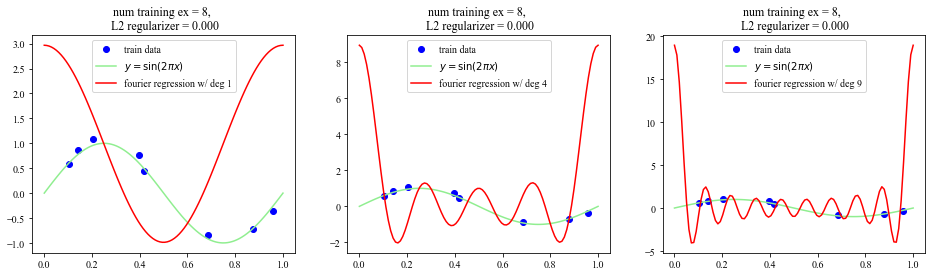

In [229]:
# plot fitted fourier regression GD curve

deg_list = [1,4,9] # M 
fig, ax = plt.subplots(nrows=1, ncols=len(deg_list), figsize=[16, 4])

for i in np.arange(len(deg_list)):
    # make plot
    M = deg_list[i]
    #y_hat_train, w_hat = poly_regression_fr(x_train, y_train, deg=M)
    X_train = make_fourier_matrix(x_train, deg=M)
    print(X_train.shape)
    w_hat = fit_FR_GD(Y=y_train, X = X_train, deg=M)
    ax[i].plot(x_train, y_train, 'o', color='blue', label="train data")
    x = np.linspace(0, 1, 100)
    ax[i].plot(x, np.sin(2*np.pi*x), color='lightgreen', label="$y=\sin(2\pi x)$")
    # ax.plot(x_train, y_hat_train, 'o', color = 'red')
    y_poly = make_fourier_matrix(x, deg=M) @ w_hat
    ax[i].plot(x, y_poly, color = 'red', label="fourier regression w/ deg %i" % M)
    ax[i].title.set_text("num training ex = %i, \n L2 regularizer = %.3f" % (N, alpha)) 
    ax[i].legend()
    plt.savefig('four_fitting_ex_2.pdf', bbox_inches='tight')


(100, 3)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 2)

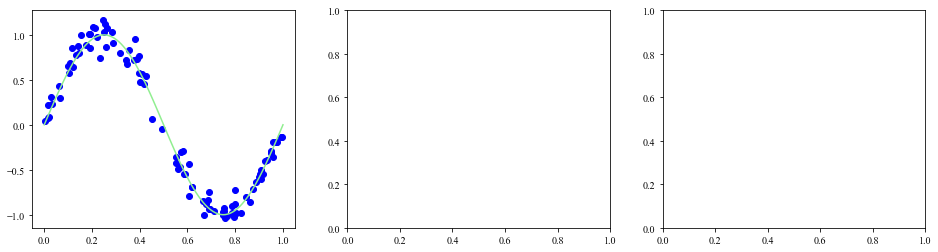

In [215]:
# plot fitted polynomial regression curve
deg_list = [1,4,9] # degree of polynomial 
fig, ax = plt.subplots(nrows=1, ncols=len(deg_list), figsize=[16, 4])
for i in np.arange(len(deg_list)):
    # make plot
    M = deg_list[i]
    alpha = alpha_list[1]
    y_hat_train, w_hat = poly_regression_fr(x_train, y_train, deg=M,)
    ax[i].plot(x_train, y_train, 'o', color='blue', label="train data")
    x = np.linspace(0, 1, 100)
    ax[i].plot(x, np.sin(2*np.pi*x), color='lightgreen', label="$y=\sin(2\pi x)$")
    # ax.plot(x_train, y_hat_train, 'o', color = 'red')
    y_poly = make_poly_matrix(x, deg=M) @ w_hat
    ax[i].plot(x, y_poly, color = 'red', label="poly regression w/ deg %i" % M)
    ax[i].title.set_text("num training ex = %i, \n L2 regularizer = %.3f" % (N, alpha)) 
    ax[i].legend()
    plt.savefig('poly_fitting_ex_2.pdf', bbox_inches='tight')
    

In [ ]:
# plot the test error for multiple values of hyperparameters 

deg_list = np.arange(1,10)
alpha_list = [0, 0.001, 0.01, 0.1, 1]
error_train_mx = np.zeros(shape=[len(deg_list), len(alpha_list)])
error_test_mx = np.zeros(shape=[len(deg_list), len(alpha_list)])

for i in np.arange(len(deg_list)):
    for j in np.arange(len(alpha_list)):
        y_hat_train, w_hat = poly_regression(x_train, y_train, deg=deg_list[i], alpha=alpha_list[j])
        y_hat_test = make_poly_matrix(x_test, deg=deg_list[i]) @ w_hat
        error_train_mx[i, j] = np.linalg.norm(y_train-y_hat_train, 2)**2/N
        error_test_mx[i, j] = np.linalg.norm(y_test-y_hat_test, 2)**2/N
# print('!!!', error_mx)


# make plot
ncols = 3
fig, ax = plt.subplots(nrows=1, ncols=ncols, figsize=[13,4])
for i in np.arange(ncols):
    ax[i].plot(deg_list, error_train_mx[:,i], color='blue', label="train error")
    ax[i].plot(deg_list, error_test_mx[:,i], color='red', label="test error")
    ax[i].set_xlabel('degree', fontsize=10)
    ax[i].title.set_text("num training ex = %i, \n L2 regularizer = %.3f" % (N, alpha_list[i])) 
    ax[i].set_ylabel('MSE', fontsize=10)
    ax[i].legend()
plt.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.savefig('poly_error_ex_2.pdf')


## Polynomial Regression + Gaussian Noise

In [7]:
def eval_polynomial(p,x):
    # p = list of coefficients; p[0] = constant term
    return sum((a*x**i for i,a in enumerate(p)))

In [8]:
def uniform(a,b):
    # sample a uniform random variable from the interval [a,b]
    return a + (b-a)*np.random.rand()

In [9]:
def poly_regression_ML(x_train, y_train, deg=9):
    # compute MLE for the coefficients w and noise variance 
    # for the poylnimal regression model with given degree
    y_hat_train, w_hat = poly_regression(x_train, y_train, deg=deg, alpha=0)
    var_hat = (1/len(x_train))*np.linalg.norm(y_train - y_hat_train,2)**2 
    return w_hat, var_hat

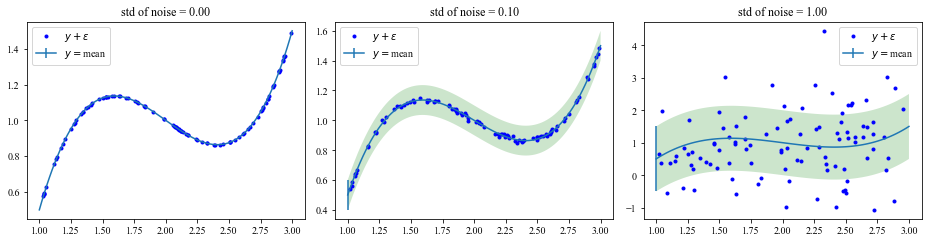

In [10]:
# Plot polynomial + Gaussian noise data

np.random.seed(1)
N = 100
p = [-6,11.5,-6,1] # coefficients of the polynomial; p[0]=constarnt term

# make plot
sigma_list = [0, 0.1, 1]
fig, ax = plt.subplots(nrows=1, ncols=len(sigma_list), figsize=[13,4])
x = np.linspace(1, 3, 100)
y = eval_polynomial(p, x)

for i in np.arange(len(sigma_list)):
    sigma = sigma_list[i]
    x_train = []
    y_train = []
    x_test = []
    y_test = []
    for k in np.arange(N):
        U1 = uniform(1,3)
        e1 = np.random.normal(0,sigma**2)
        x_train.append(U1)
        y_train.append(eval_polynomial(p,U1)+e1)

    x_train = np.asarray(x_train)
    y_train = np.asarray(y_train)
    
    markers, caps, bars = ax[i].errorbar(x, y, yerr=sigma, fmt='', marker=None, label="$y=$mean", errorevery=100)
    ax[i].fill_between(x, y - sigma, y + sigma, facecolor='g', alpha=0.2)
    ax[i].plot(x_train, y_train, '.', color='blue', label="$y+\epsilon$")
    ax[i].title.set_text("std of noise = %.2f" % sigma) 
    ax[i].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.savefig('poly_noise_ex.pdf')
    

9


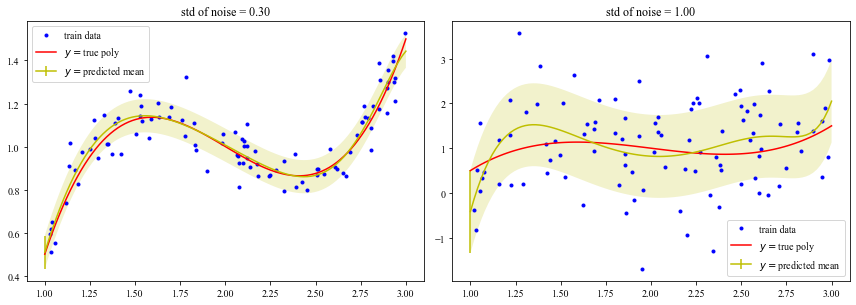

In [11]:
# fit poly regression + ML and plot 
print(M)

np.random.seed(1)
N = 100
p = [-6,11.5,-6,1] # coefficients of the polynomial; p[0]=constarnt term
# p = [3, 0, 0, 0]
deg = 9
sigma_list = [0.3, 1]


fig, ax = plt.subplots(nrows=1, ncols=len(sigma_list), figsize=[12,5])
x = np.linspace(1, 3, 100)
y = eval_polynomial(p, x)

for i in np.arange(len(sigma_list)):
    sigma = sigma_list[i]
    
    # generate data 
    x_train = []
    y_train = []
    for k in np.arange(N):
        U1 = U1 = uniform(1,3)
        e1 = np.random.normal(0,sigma**2)
        x_train.append(U1)
        y_train.append(eval_polynomial(p,U1)+e1)

    x_train = np.asarray(x_train)
    y_train = np.asarray(y_train)
    
    w_hat, var_hat = poly_regression_ML(x_train, y_train, deg=deg)
    std_hat = np.sqrt(var_hat)
    y_hat_mean = make_poly_matrix(x, deg=M) @ w_hat

    markers, caps, bars = ax[i].errorbar(x, y_hat_mean, yerr=std_hat, fmt='', color='y', marker=None, label="$y=$predicted mean", errorevery=100)
    ax[i].fill_between(x, y_hat_mean - std_hat, y_hat_mean + std_hat, facecolor='y', alpha=0.2)
    ax[i].plot(x_train, y_train, '.', color='blue', label="train data")
    ax[i].plot(x, y, color='red', label="$y=$true poly")
    ax[i].title.set_text("std of noise = %.2f" % sigma) 
    ax[i].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.savefig('poly_noise_ML_ex.pdf', bbox_inches='tight')

## Bayesian Polynomial Regression

In [12]:
def bayesian_poly_regression(x_train, y_train, x, deg=9, tau=0.1, sigma=0.1):
    # fit Bayesian polynomial regression of given degree with Gaussian prior on coefficients w:
    # w ~ N(0, \tau^2 I)
    # sigma = known noise std
    # Output is the mean and variance of the predictive Gaussian distribution for input x
    x_vec = make_poly_matrix([x], deg=deg).T
    X = make_poly_matrix(x_train, deg=deg)
    S1 = tau**(-2) * np.identity(deg+1) + sigma**(-2) * X.T @ X
    S = np.linalg.pinv(S1)
    mean_w = sigma**(-2) * S @ X.T @ y_train
    mean = mean_w.T @ x_vec
    # print('!!! mean.shape', mean.shape)
    var = sigma**(2) + x_vec.T @ S @ x_vec
    return mean[0], var[0,0]

bayesian_poly_regression(x_train, y_train, 1, deg=9, tau=0.1, sigma=0.1)

(0.7117095627623268, 0.010795531984523432)

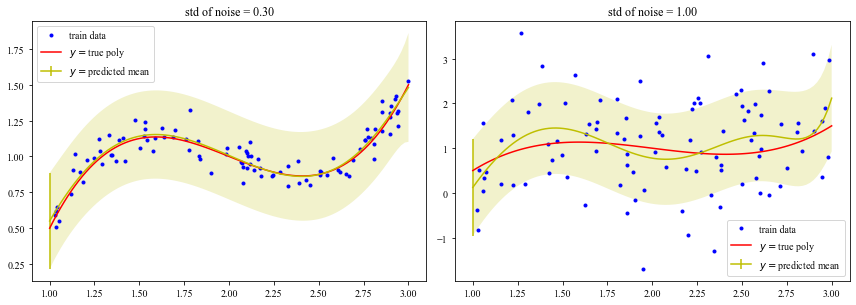

In [13]:
# make plot
np.random.seed(1)
N = 100
p = [-6,11.5,-6,1] # coefficients of the polynomial; p[0]=constarnt term
# p=[3, 0, 0, 0]
deg = 9
tau = 10 # prior std of coefficients w
sigma_list = [0.3, 1]

fig, ax = plt.subplots(nrows=1, ncols=len(sigma_list), figsize=[12,5])
x = np.linspace(1, 3, 100)
y = eval_polynomial(p, x)

for i in np.arange(len(sigma_list)):
    sigma = sigma_list[i]
    
    # generate data 
    x_train = []
    y_train = []
    for k in np.arange(N):
        U1 = uniform(1,3)
        e1 = np.random.normal(0,sigma**2)
        x_train.append(U1)
        y_train.append(eval_polynomial(p,U1)+e1)

    x_train = np.asarray(x_train)
    y_train = np.asarray(y_train)

    # compute prediction
    y_hat_mean = []
    y_hat_std = []
    for j in np.arange(len(x)):
        mean, var = bayesian_poly_regression(x_train, y_train, x=x[j], deg=deg, tau=tau, sigma=sigma)
        y_hat_mean.append(mean)
        y_hat_std.append(np.sqrt(var))

    y_hat_mean = np.asarray(y_hat_mean)
    y_hat_std = np.asarray(y_hat_std)
    
    markers, caps, bars = ax[i].errorbar(x, y_hat_mean, yerr=y_hat_std, fmt='', color='y', marker=None, label="$y=$predicted mean", errorevery=100)
    ax[i].fill_between(x, y_hat_mean - y_hat_std, y_hat_mean + y_hat_std, facecolor='y', alpha=0.2)
    ax[i].plot(x_train, y_train, '.', color='blue', label="train data")
    ax[i].plot(x, y, color='red', label="$y=$true poly")
    ax[i].title.set_text("std of noise = %.2f" % sigma) 
    ax[i].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.savefig('poly_noise_bayesian_ex.pdf', bbox_inches='tight')

In [24]:
c = (3 + 2j)
d = (3 - 2j)
f = c*d
print('Complex', f.imag)
print(f)

Complex 0.0
(13+0j)


AttributeError: 'numpy.ndarray' object has no attribute 'append'